In [1]:
import mpf_py  # Assuming mpf_py.MPF is available
from utils import gen_data, plot_2d_model_predictions, true_model3  # Adjust import according to your project structure
import numpy as np

x_train, y_train = gen_data(n=5000, seed=3, model=true_model3)
x_test, y_test = gen_data(n=5000, seed=4, model=true_model3)


In [2]:

# Fit the best MPF model with identified=True
best_params = {'epochs': 3,
 'n_iter': 28,
 'split_try': 16,
 'B': 40,
 'colsample_bytree': 1.0,
 'identified': True}
model, _ = mpf_py.MPF.fit_boosted(
    x_train, y_train,
    **best_params
)


err: 0.5290776092385385
err: 0.5284791127290368
err: 0.5185453540133128
err: 0.5168064939409907
err: 0.49994174761055427
err: 0.4995918830055205
err: 0.5123580225353348
err: 0.5347542952243207
err: 0.5226892729669744
err: 0.518650030454173
err: 0.523553209116901
err: 0.5140169268408059
err: 0.5155951940974822
err: 0.524969342993191
err: 0.5187800056666889
err: 0.5222592105586215
err: 0.502310852566739
err: 0.5169518121865675
err: 0.5117721400571698
err: 0.508907152131134
err: 0.5208846821483716
err: 0.5322080137045963
err: 0.5261454711911664
err: 0.5087563274821383
err: 0.5235853102436271
err: 0.5095019936288124
err: 0.5177200199797115
err: 0.5177243118591588
err: 0.5232401098504003
err: 0.5185111763730792
err: 0.5157839556937519
err: 0.5197460502491825
err: 0.5107140538545059
err: 0.5298505821887513
err: 0.5379987618244209
err: 0.5235194407317991
err: 0.5195535725028818
err: 0.5291862695869712
err: 0.5135290393144462
err: 0.503048918112509
Combining tree grids into a single tree grid.

In [3]:

# Make predictions
predictions = model.predict(x_test)
test_error = np.mean((y_test - predictions) ** 2)
print(f"Test MSE: {test_error}")


Test MSE: 0.2675752639186262


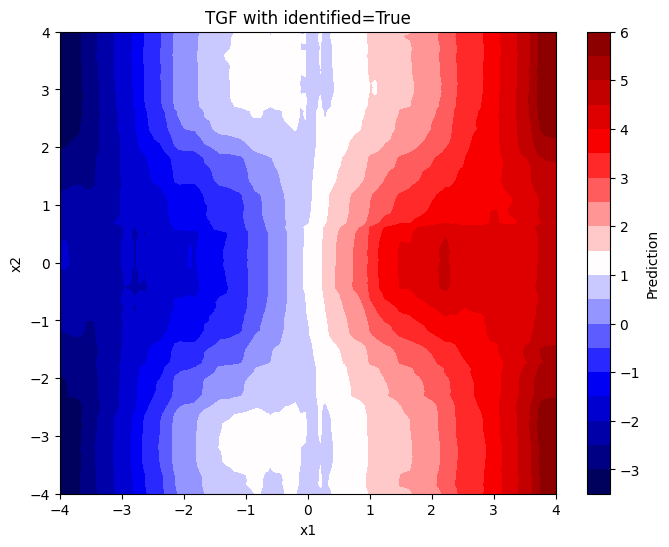

Combining tree grids into a single tree grid.


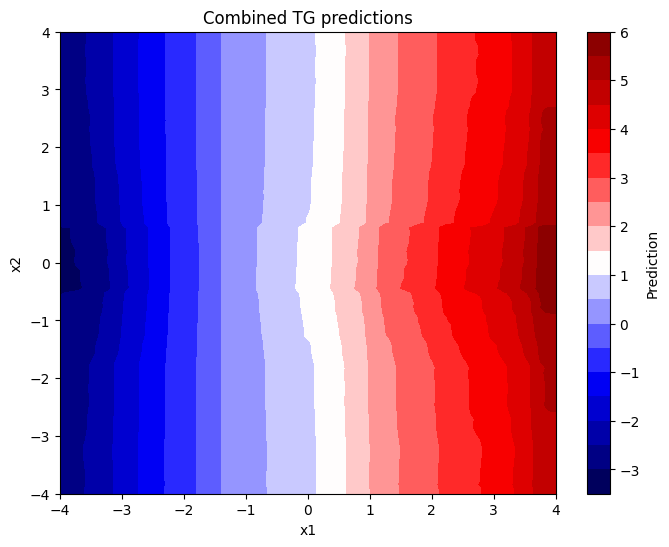

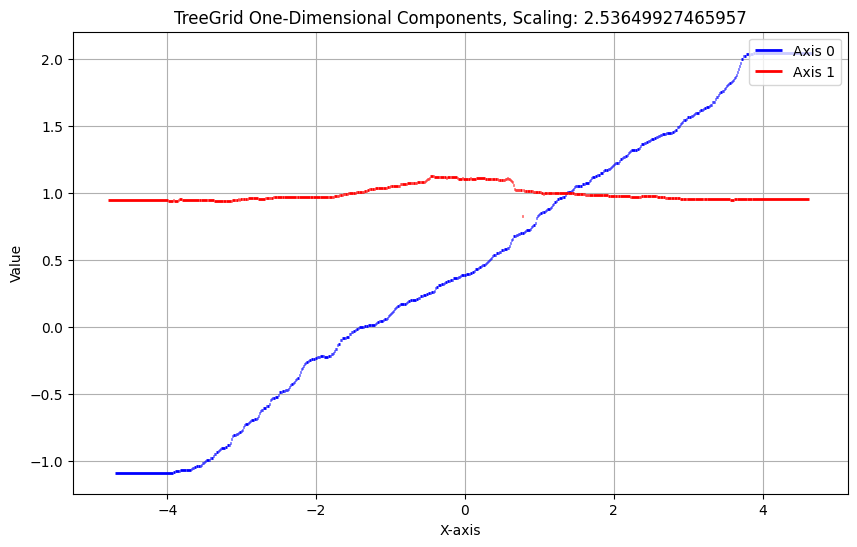

Combining tree grids into a single tree grid.


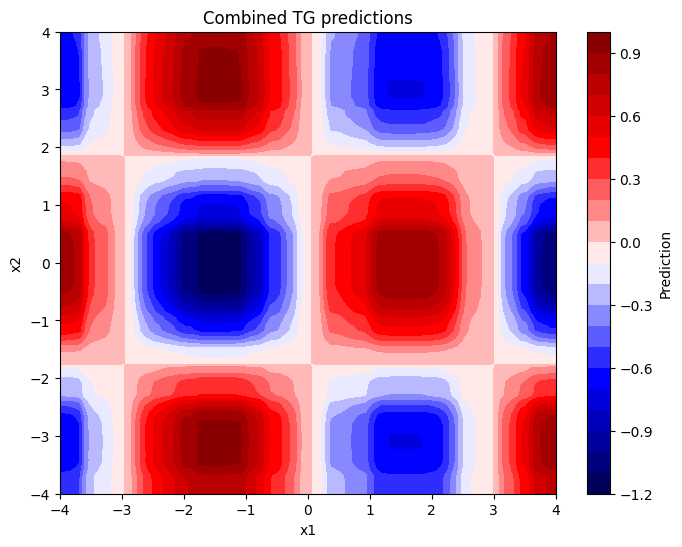

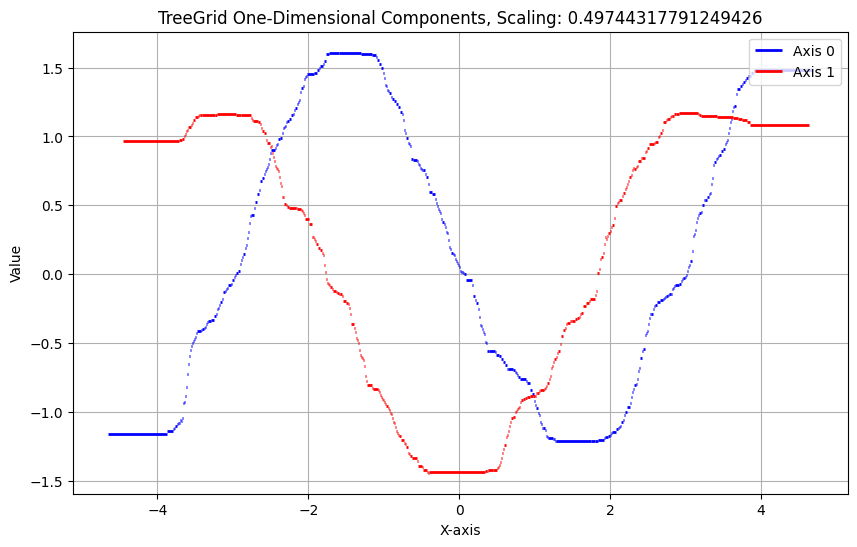

Combining tree grids into a single tree grid.


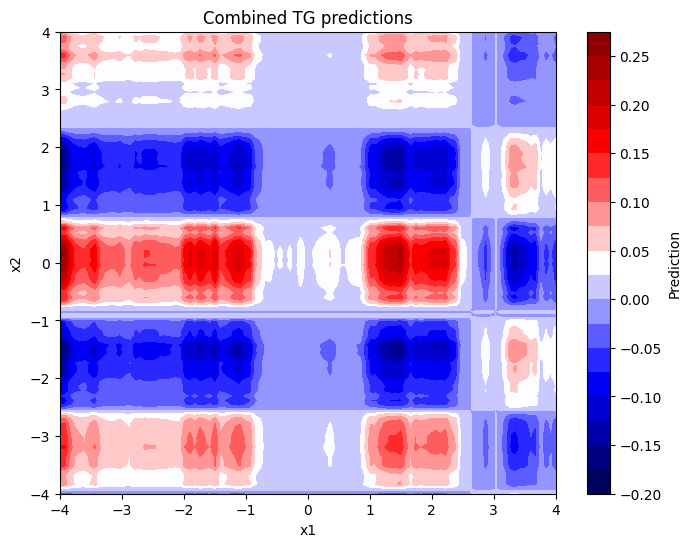

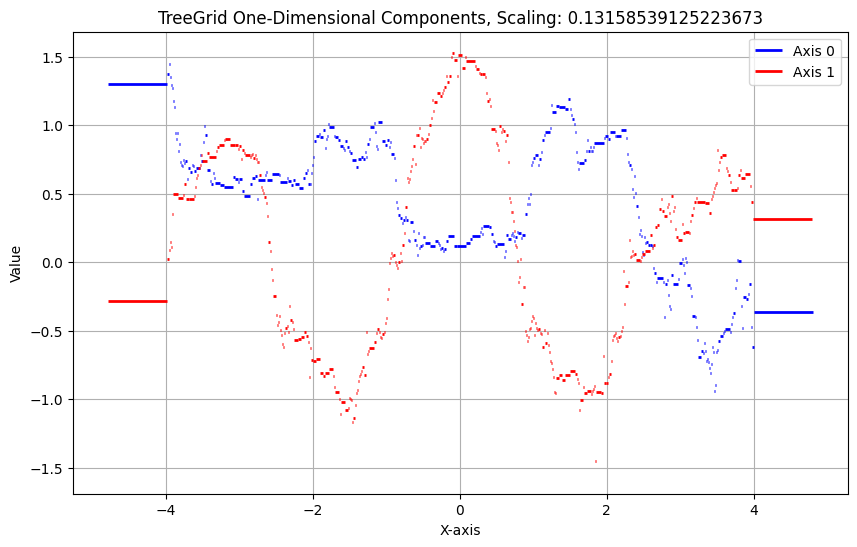

In [4]:

plot_2d_model_predictions(lambda x: model.predict(x), title="TGF with identified=True")
combined_tgs = []

for tgf in model.tree_grid_families:
    combined_tg = mpf_py.TreeGrid(tgf.combined_tree_grid)
    plot_2d_model_predictions(lambda x: combined_tg.predict(x), title="Combined TG predictions")
    combined_tg.plot_components()
    combined_tgs.append(combined_tg)
